<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Segmentez-des-clients-d'un-site-e-commerce" data-toc-modified-id="Segmentez-des-clients-d'un-site-e-commerce-1"><strong>Segmentez des clients d'un site e-commerce</strong></a></span></li><li><span><a href="#0.Imports-and-function" data-toc-modified-id="0.Imports-and-function-2">0.Imports and function</a></span></li><li><span><a href="#1.-Les-données" data-toc-modified-id="1.-Les-données-3">1. Les données</a></span><ul class="toc-item"><li><span><a href="#1.1-Customers" data-toc-modified-id="1.1-Customers-3.1">1.1 Customers</a></span></li><li><span><a href="#1.2-Geolocation" data-toc-modified-id="1.2-Geolocation-3.2">1.2 Geolocation</a></span></li><li><span><a href="#1.3.-Orders" data-toc-modified-id="1.3.-Orders-3.3">1.3. Orders</a></span></li><li><span><a href="#1.4-Order-items" data-toc-modified-id="1.4-Order-items-3.4">1.4 Order items</a></span></li><li><span><a href="#1.5-Order-payment" data-toc-modified-id="1.5-Order-payment-3.5">1.5 Order payment</a></span></li><li><span><a href="#1.6-Reviews" data-toc-modified-id="1.6-Reviews-3.6">1.6 Reviews</a></span></li><li><span><a href="#1.7-Products" data-toc-modified-id="1.7-Products-3.7">1.7 Products</a></span></li><li><span><a href="#1.8-Sellers" data-toc-modified-id="1.8-Sellers-3.8">1.8 Sellers</a></span></li></ul></li><li><span><a href="#2.-Traitement-des-valeurs-manquantes" data-toc-modified-id="2.-Traitement-des-valeurs-manquantes-4">2. Traitement des valeurs manquantes</a></span></li><li><span><a href="#3.-Analyse-exploratoire-des-données" data-toc-modified-id="3.-Analyse-exploratoire-des-données-5">3. Analyse exploratoire des données</a></span><ul class="toc-item"><li><span><a href="#3.1-Distribution-des-variables" data-toc-modified-id="3.1-Distribution-des-variables-5.1">3.1 Distribution des variables</a></span></li><li><span><a href="#3.2-Boites-à-moustaches-et-valeurs-aberrantes" data-toc-modified-id="3.2-Boites-à-moustaches-et-valeurs-aberrantes-5.2">3.2 Boites à moustaches et valeurs aberrantes</a></span><ul class="toc-item"><li><span><a href="#3.2.1-real_delivery_time" data-toc-modified-id="3.2.1-real_delivery_time-5.2.1">3.2.1 real_delivery_time</a></span></li><li><span><a href="#3.2.2-estimated_delivery_time" data-toc-modified-id="3.2.2-estimated_delivery_time-5.2.2">3.2.2 estimated_delivery_time</a></span></li><li><span><a href="#3.2.3-delay" data-toc-modified-id="3.2.3-delay-5.2.3">3.2.3 delay</a></span></li><li><span><a href="#3.2.4-price" data-toc-modified-id="3.2.4-price-5.2.4">3.2.4 price</a></span></li><li><span><a href="#3.2.5-freight_value" data-toc-modified-id="3.2.5-freight_value-5.2.5">3.2.5 freight_value</a></span></li><li><span><a href="#3.2.6-distance" data-toc-modified-id="3.2.6-distance-5.2.6">3.2.6 distance</a></span></li></ul></li><li><span><a href="#3.3-Agrégation-sur-customer_unique_id" data-toc-modified-id="3.3-Agrégation-sur-customer_unique_id-5.3">3.3 Agrégation sur <code>customer_unique_id</code></a></span></li><li><span><a href="#3.4-Corrélations-entre-variables-et-ACP" data-toc-modified-id="3.4-Corrélations-entre-variables-et-ACP-5.4">3.4 Corrélations entre variables et ACP</a></span><ul class="toc-item"><li><span><a href="#3.4.1-Corrélations" data-toc-modified-id="3.4.1-Corrélations-5.4.1">3.4.1 Corrélations</a></span></li><li><span><a href="#3.4.2-ACP" data-toc-modified-id="3.4.2-ACP-5.4.2">3.4.2 ACP</a></span></li></ul></li></ul></li><li><span><a href="#4.-Conclusions" data-toc-modified-id="4.-Conclusions-6">4. Conclusions</a></span></li></ul></div>

# **Segmentez des clients d'un site e-commerce**

Olist est une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Olist souhaite que je fournisse à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Mon objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Je devrai fournir à l’équipe marketing une description actionable de ma segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.


Pour cette mission, Olist a fourni une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.
A partir de cette base des données, il faudra utilisere des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Ce notebook est consacré au nettoyage et à l'analyse des données.

# 0.Imports and function

In [1]:
%load_ext pycodestyle_magic 
%pycodestyle_on

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import haversine as hs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# fonction pour plotter le cercle de correlation,
# source: TP du cours sur l'exploration des données
def plot_correlations(data, x, y):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 pca.components_[x, i],  # 0 for PC1
                 pca.components_[y, i],  # 1 for PC2
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02)

        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 data.columns[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} {}%'.format(
        x+1, round(100*pca.explained_variance_ratio_[x])))
    plt.ylabel('F{} {}%'.format(
        x+2, round(100*pca.explained_variance_ratio_[y])))

    plt.title('Cercle des corrélations (F{} et F{})'.format(x+1, y+1))

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)

In [4]:
# paramètres matplotlib
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11

# 1. Les données

Les données, disponibles sur https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce sont reparties sur plusieurs fichiers:
 - olist_customers_dataset.csv
 - olist_geolocation_dataset.csv
- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv 
- olist_orders_dataset.csv
- olist_products_dataset.csv
 - olist_sellers_dataset.csv
 
Le schema des données est illustré ci-dessous: 
![alt text](HRhd2Y0.png "Title")

Je vais commencer à examiner les fichiers un par un afin de mieux comprendre les données, sélectionner les variables d'intérêt et enfin regrouper les données dans un seul dataframe.

## 1.1 Customers

Ce fichier contient des informations sur les clients et leurs emplacement.

In [4]:
# lectures données
customers = pd.read_csv('Data/Source/olist_customers_dataset.csv')

In [5]:
# nombre ligne et colonnes
customers.shape

(99441, 5)

In [6]:
# echantillon données
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
48547,09803e29b7c6ecb7de771936dd75302b,5e30ac16a0659e3fde66a7e3ee135da9,8275,sao paulo,SP
98433,bdb17993d471e48340c10c554b57ad7d,de29b95d009359f46b6a7e8f7d932e21,29175,serra,ES
43787,e37623a7c983c5174d5aea2aad30a080,7d8edfd1d3efadef19da57a63d21ed92,83843,doce grande,PR
63375,deb460805396b2a842889d73a69d3c23,49644562b8dd8d8edaecf9a510b73361,65085,sao luis,MA
37762,1316bddb2ff7d5ad98530bd2b0c9a454,c8592d5ae5bde92205a4eedb41d9455e,35430,ponte nova,MG


In [7]:
# types des données
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
# valeurs manquantes
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
# doublons customer_id
customers['customer_id'].duplicated().sum()

0

In [10]:
# doublons customer_unique_id
customers['customer_id'].duplicated().sum()

0

A chaque commande correspond un identifiant, `customer_id`. Cela signifie qu'un même client, identifié par le `customer_unique_id`, obtiendra des `customer_id` différents pour différentes commandes. En prenant le ratio entre le nombre des doublons de la variable `customer_unique_id` et le nombre totale des lignes, on peut trouver le pourcentage des clients qui ont effectué plusieurs commandes.

In [11]:
# pourcentage clients ayant effectué plusieurs commandes
customers['customer_unique_id'].duplicated().sum()/customers.shape[0]

0.033638036624732255

Que le 3% des clients ont effectué plusieurs commandes.

Je vais m'intéresser à l'emplacement géographique des clients: en effet, selon la ville et l'état ,il pourrait y avoir des différences en termes d'achats. Aussi, la distance entre client et vendeur pourrait avoir une influence sur le comportement (par exemple, certaines personnes pourraient préfèrent acheter 'local').

In [12]:
# nombre de zipcodes
customers['customer_zip_code_prefix'].unique().size

14994

In [13]:
# nombre de villes
customers['customer_city'].unique().size

4119

Le nombre de zipcodes et des villes est beaucoup trop grand pour penser de l'utiliser pour segmenter les clients.

In [14]:
# nombre d'états
customers['customer_state'].unique().size

27

In [15]:
# comptage valeurs nombre d'états
customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

Les états les plus peuplés du Brésil sont São Paulo, Minas Gerais et Rio de Janeiro, celui le moins peuplé est Roraima - RR - (https://en.wikipedia.org/wiki/Federative_units_of_Brazil), ce qui correspond à peu près au classement, en termes de nombre des commandes, des données. Ainsi, je peux supposer que le nombre des commandes soit proportionnel à la population d'un état et donc pas forcement utile pour comprendre le comportement des clients. 
Je vais supprimer les variables `customer_city` et `customer_state`. Je vais garder la variable `customer_zip_code_prefix` que je vais utiliser par la suite pour calculer la distance entre client et vendeur.

In [16]:
# suppression variables non pertinentes
customers = customers.drop(['customer_city', 'customer_state'], axis=1)

In [17]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

## 1.2 Geolocation

Ce jeu des données contient des informations sur les codes postaux brésiliens et leurs coordonnées géographiques (latitude et longitude).

In [18]:
# lecture données
geolocation = pd.read_csv('Data/Source/olist_geolocation_dataset.csv')

In [19]:
# échantillon données
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
884570,86042,-23.362979,-51.143005,londrina,PR
152129,6186,-23.534968,-46.813597,osasco,SP
824788,78320,-11.422026,-58.761591,juina,MT
909623,88310,-26.896825,-48.701355,itajaí,SC
82660,4205,-23.571289,-46.606780,sao paulo,SP


In [20]:
# nombre des lignes et colonnes
geolocation.shape

(1000163, 5)

In [21]:
# types des données
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [22]:
# valeurs manquantes
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Comme déjà expliqué dans la section 1.1, la ville et l'état ne vont pas m’intéresser pour la segmentation et je vais les supprimer.

In [23]:
# suppression variables non pertinentes
geolocation = geolocation.drop(['geolocation_city', 'geolocation_state'],
                               axis=1)

Comme l'on peut voir dans l'example suivant, pour chaque zipcode les coordonnés géographiques peuvent être légèrement différentes.

In [24]:
# données avec zip_code_prefix = 6663
geolocation[geolocation['geolocation_zip_code_prefix'] == 6663]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
166839,6663,-23.563372,-46.937101
166856,6663,-23.551594,-46.940839
166862,6663,-23.557664,-46.939495
166871,6663,-23.557521,-46.934431
166876,6663,-23.559813,-46.941309
...,...,...,...
169293,6663,-23.552483,-46.937114
169312,6663,-23.552890,-46.943818
169316,6663,-23.551930,-46.942566
169338,6663,-23.553158,-46.938335


Je vais effectuer une agrégation des zipcodes en utilisant la moyenne, ainsi on aura latitude et longitude moyenne pour chaque zipcode.

In [25]:
# agrégation
geolocation = geolocation.groupby('geolocation_zip_code_prefix').agg('mean')

In [26]:
# statistiques de base des coordonnées géographiques
geolocation.describe()

,geolocation_lat,geolocation_lng
count,19015.000000,19015.000000
mean,-19.055250,-46.057645
std,7.295792,5.365775
min,-33.689948,-72.916069
25%,-23.564143,-49.001737
50%,-22.416053,-46.631931
75%,-15.612108,-43.255374
max,42.184003,121.105394


En regardant le valeurs maximales de latitude et longitude, on peut se rendre compte que certaines coordonnées geographique ne se trouvent pas au Brésil  (l'étendue latitudinale du Brésil est de 5°15'N à 33°45'S. L'étendue longitudinale du Brésil est de 34°45'E à 73°48'W).

Je vais mieux examiner les valeurs aberrantes.

In [27]:
# nombre valeurs aberrantes
geolocation[(geolocation['geolocation_lat'] > 5) |
            (geolocation['geolocation_lng'] > 34)].shape

(9, 2)

In [28]:
# valeurs aberrantes
geolocation[(geolocation['geolocation_lat'] > 5) |
            (geolocation['geolocation_lng'] > 34)]

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
18243,28.008978,-15.536867
46560,13.001420,-23.583939
58441,5.013519,-29.384846
68275,22.567952,-27.698087
68379,9.049063,-25.170903
68447,7.271649,-40.315884
78131,38.816816,-9.394625
83252,42.184003,-8.723762
95130,14.585073,121.105394


Etant donné que les valeurs aberrantes sont peu nombreux, je vais le remplacers en cherchant sur internet les coordonnées correctes.

In [29]:
# remplacement valeurs aberrantes
geolocation.loc[18243] = [-23.54222, -48.305]
geolocation.loc[46560] = [-12.99209, -42.22238]
geolocation.loc[58441] = [-7.180165016054178, -35.979434275259266]
geolocation.loc[68275] = [-1.4669505234541502, -56.379455383888526]
geolocation.loc[68379] = [-8.319528012347314, -55.09925905039131]
geolocation.loc[68447] = [-1.516972527581508, -48.69190675158169]
geolocation.loc[78131] = [-15.65652, -56.15606000000001]
geolocation.loc[83252] = [-25.52470175619802, -48.51545711094667]
geolocation.loc[95130] = [-29.23733389923742, -51.02468939940931]

Je peux enfin effectuer une jointure de ce dataframe avec celui des clients en utilisant `geolocation_zip_code_prefix` comme clé.

Pour vérifier que la jointure ait été effectuée correctement, je vais vérifier que le nombre des lignes du dataframe `customers` soit le même avant et après jointure.


In [30]:
# nombre des commandes avant merge
customers.shape[0]

99441

In [31]:
# merge
customers = pd.merge(customers,
                     geolocation,
                     how='left',
                     left_on='customer_zip_code_prefix',
                     right_on='geolocation_zip_code_prefix')

In [32]:
# nombre des commandes apreès merge
customers.shape[0]

99441

In [33]:
# vérification du merge
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
29783,d4c85a033e496942839f448797611939,351f8f0301502a98ad31c9e626529c7c,5734,-23.625699,-46.743468
23394,0a9b104fa661da38bed249cddffb4ce3,84143652c76c6c5b56af10e53c16ec8e,9820,-23.740897,-46.555203
60034,8e68059b819a389508e2a37f46343e60,72519c12ba1fb400c3a095f86a1c37b3,66023,-1.461374,-48.497530
57241,d1a2056f6e6e1584ba56d6e6f0285e56,2e0d4931217e13e3044c55b8ba40bce5,62823,-4.840908,-37.781214
33555,208351e39f4ca153f72012d7a6ba23b9,969eb8bf4c0fce047dfd0ee78ce9a205,14530,-20.182732,-48.027802


In [34]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

## 1.3. Orders

Ce jeu de données contient des informations sur le statut des commandes, les dates d'achat, les dates d'approbation de la commande, les dates de livraison etc.

In [35]:
# lecture données
orders = pd.read_csv('Data/Source/olist_orders_dataset.csv')

In [36]:
# échantillon données
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2317,48ac627a65c15df7cebf426bda6e6077,b5dff22ad6f2531a66adde7810935f70,delivered,2017-10-18 23:22:31,2017-10-19 00:40:57,2017-10-23 15:52:58,2017-10-28 13:21:46,2017-11-14 00:00:00
90745,9c370b3dbcadfb3a62c2b8466603fa1f,a949e48c89ff4cf4e5f14fba155eb16c,delivered,2017-06-03 19:00:27,2017-06-03 19:10:14,2017-06-06 14:04:44,2017-06-28 12:33:37,2017-07-10 00:00:00
93867,27fe1bf2ef6671ce5e66d6958f828422,c40a784c17fc33789c6778125abd1fe7,delivered,2017-08-07 01:06:50,2017-08-07 01:24:06,2017-08-21 21:17:58,2017-08-24 19:53:32,2017-08-30 00:00:00
11110,79c4bd6c466a226de3a2b9ee556a0116,05010516b844e532c5dde4da1f0269cc,delivered,2017-03-13 16:38:40,2017-03-13 16:38:40,2017-03-14 18:19:06,2017-03-29 17:25:01,2017-04-10 00:00:00
79419,0559598ddb2398bb4c202d6efd54f04e,496336231bd05e1117aacb8263e47608,delivered,2018-07-13 21:43:39,2018-07-17 04:32:18,2018-07-23 17:10:00,2018-07-24 22:14:38,2018-07-26 00:00:00


In [37]:
# nombre des lignes et colonnes
orders.shape

(99441, 8)

In [38]:
# types des données
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [39]:
# valeurs manquantes
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
# doublons order_id
orders['order_id'].duplicated().sum()

0

In [41]:
# doublons customer id
orders['customer_id'].duplicated().sum()

0

A chaque `order_id` correspond bien un seul `customer_id`.

In [42]:
# status commande
orders['order_status'].value_counts(normalize=True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

La plupart des commandes a été livré, mais certaines commandes n'ont pas été livrées ou sont toujours en cours. Je vais regarder des exemples des commandes non livrées


In [43]:
# dataframe des commandes non livrées
orders_not_delivered = orders[orders['order_status'] != 'delivered']

In [44]:
# échantillon des commandes non livrées
orders_not_delivered.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
39655,1f66f9bfd244a5383aeb00a84ad12a66,b692755548475c6db9d19858c5da06f1,canceled,2016-10-10 10:49:54,2016-10-10 12:01:56,NaN,NaN,2016-12-08 00:00:00
10927,749d73f14d7f582a7c7b12894d552da2,e265a180914056bc0152a2c2bf86721d,shipped,2018-02-14 13:28:09,2018-02-14 13:47:35,2018-02-15 21:34:42,NaN,2018-03-07 00:00:00
60733,3579ad4440247fd01709d8583ae2c137,0c2350ac90a7c2d4a6f04bf7fa330125,shipped,2017-11-30 10:31:05,2017-11-30 11:02:21,2017-12-04 21:22:06,NaN,2017-12-26 00:00:00
80940,02ec4da9d03014f06d711d60eb37cc22,79e6d859cf83e9bf76a07629ca91a49c,shipped,2017-04-28 12:32:56,2017-04-28 13:05:49,2017-05-11 11:12:57,NaN,2017-05-24 00:00:00
48071,3dcd6dc6516ed823141649f1fee54303,343e60c28c010a14f60d1121ba11a054,shipped,2017-05-31 13:19:06,2017-05-31 13:35:09,2017-05-31 16:20:37,NaN,2017-06-29 00:00:00
20326,eb3c2af8fb549b98c453e7bfb641da91,9323fd17ec223b6127816f5a6b2e99bf,unavailable,2017-05-09 09:37:25,2017-05-09 09:55:25,NaN,NaN,2017-06-05 00:00:00
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
3547,534a0fbe91a806a1dc6bf09b497e3d6f,d17ae8582d302dbd41b87e5028e8c0e2,unavailable,2018-01-22 02:45:40,2018-01-23 03:36:43,NaN,NaN,2018-02-06 00:00:00
38066,8fdc42676c9c6c74c4f8f062b53ebafa,54545530685ab329b0d79c2e40ee3aca,invoiced,2017-12-03 21:20:17,2017-12-03 22:32:13,NaN,NaN,2017-12-29 00:00:00


Il ne s'agit pas que des commandes très recentes qui sont en cours de livraison. Certains commandes ont ete expediées ou facturées mais il n'y a pas de date de livraison ou le status n'est pas disponible. 
Si il y a eu des soucis avec la commandes et/ou la livraison, ceci pourrait expliquer pourquoi un client n'est pas retourné acheter sur Olist. 

Je prefere me concentrer sur les clients qui ont bien ete livrés.

In [45]:
# filtre pour ne garder que les commandes livrées
orders = orders[orders['order_status'] == 'delivered']

Sauf pour la date d'achat, qui servira pour calculer la recence et effectuer l'analyse de la stabilité des segments au cours du temps, je ne m'intéresse pas aux dates telles qu'elles. 

A partir des dates, je peux créer des variables potentiellement utiles pour la segmentation: le délai réel de livraison (`real_delivery_time`), le délai estimé de livraison (`estimated_delivery_time`) et le retard (ou avance) de la livraison par rapport au delai de livraison estimé (`delay`). 
Pour ce faire il faut d'abord transformer les variables en variables de type datetime.


In [46]:
# conversion en datetime
orders[['order_purchase_timestamp',
        'order_delivered_customer_date',
        'order_estimated_delivery_date']] = pd.to_datetime(
    orders[['order_purchase_timestamp',
            'order_delivered_customer_date',
            'order_estimated_delivery_date']].stack()
).unstack()

In [47]:
# delay réel de livraison (en jours)
orders['real_delivery_time'] = (
    orders['order_delivered_customer_date']
    - orders['order_purchase_timestamp']
).astype('timedelta64[D]')

In [48]:
# delai estimé de livraison (en jours)
orders['estimated_delivery_time'] = (
    orders['order_estimated_delivery_date']
    - orders['order_purchase_timestamp']
).astype('timedelta64[D]')

In [49]:
# difference entre date de livraison effective et estimée (en jours)
orders['delay'] = (
    orders['order_delivered_customer_date']
    - orders['order_estimated_delivery_date']
).astype('timedelta64[D]')

In [50]:
# date de la prèmiere commande
orders['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

In [51]:
# date de la dernière commande
orders['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

Enfin, je peux supprimer les variables non pertinentes et effectuer une jointure avec le dataframe `customers` en utilisant le `customer_id` comme clé. La jointure sera de type inner, pour ne garder que les commandes livrées.

In [52]:
# suppression des variables non pertinentes
orders.drop([
    'order_status',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'],
     axis=1, inplace=True
)

In [53]:
# jointure
customers = pd.merge(customers,
                     orders,
                     how='inner',
                     left_on='customer_id',
                     right_on='customer_id')

In [54]:
# vérification que le nombre de lignes du dataframe customers
# soit égal au nombre des commandes
customers.shape[0] == orders.shape[0]

True

In [55]:
# nombre de commandes
customers.shape[0]

96478

In [56]:
# vérification du merge
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,8.0,19.0,-11.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,16.0,24.0,-8.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,26.0,24.0,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,14.0,27.0,-13.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,11.0,16.0,-6.0


In [57]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

## 1.4 Order items

Ce jeu de données contient des informations sur les articles achetés dans chaque commande: le nombre de produits achetés, les vendeurs, le prix et les frais de livraison.

In [58]:
# lecture données
order_items = pd.read_csv('Data/Source/olist_order_items_dataset.csv')

In [59]:
# échantillon données
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
53935,7aa5fe5b772da0099ed083f51f800e8c,1,9f22d89800e8f59f79d50aa9d732f5e2,c9aafcd0621b2207c10e32c649cada4d,2018-08-10 18:10:15,71.00,8.66
45061,6672ea757b340c6ebd644244a2c982ae,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,2018-07-06 08:32:03,49.00,7.60
73433,a75f9d41f99d675f35ab8b90b2dc9b2f,1,7bdb0c9137fdc67e666061dc0ee2838c,49e7217cfe4e427191c378ec626d8737,2018-06-04 20:55:11,48.90,50.85
40634,5c87f97c103f08f9cd977b07384a3fd3,1,66e9fb73e349cba44b29951e558a6780,98dac6635aee4995d501a3972e047414,2017-06-02 20:30:27,9.60,16.11
562,0148d3df00cebda592d4e5f966e300cc,5,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85


In [60]:
# nombre de lignes et colonnes
order_items.shape

(112650, 7)

In [61]:
# types des variables
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [62]:
# valeurs manquantes
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [63]:
# nombre doublons
order_items['order_id'].duplicated().sum()

13984

Certains commandes peuvent contenir plusieurs produits; dans ce cas pour le même `order_id` il y aura plusieurs lignes, correspondants aux différents produits achetés.

In [64]:
# échantillon commandes comprenant plusieurs produits
order_items[order_items['order_id'].duplicated()].sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
99915,e298159aa5f22e9d556add24a66be952,3,b8411dee248601bc460bac8e1fb8a102,1900267e848ceeba8fa32d80c1a5f5a8,2018-02-01 14:59:01,22.99,15.49
80311,b6b9f5144b004ad3db40567cdce34811,2,6292e8c74db1d4defdbd8244c1101bb6,a3fa18b3f688ec0fca3eb8bfcbd2d5b3,2018-05-07 10:31:02,23.90,18.23
103405,ead893b6feb078f2a8f88787db56dcc7,2,9a36ef546bfd8ad2c01c308dcfe4084f,ae45df84722b1d15c5f32b23a095746c,2018-06-25 09:58:12,99.90,7.96
27335,3e286b2b3cdfba0787bfddb3b98c894f,4,a9410f6e58948e056b9eae0653aa0c75,670c26e0f1bf8d0576271d5cfaec6d2b,2018-06-13 20:22:52,33.50,22.16
82769,bbfcb9e2e2d656df90c1e837f5f47c09,2,0a57f7d2c983bcf8188589a5fea4a8da,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-03 17:32:00,97.90,11.89
46191,68e48e68da1f50f7c5838ea75e3a20dd,3,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,2018-06-22 17:00:57,84.90,13.25
77079,af822dacd6f5cff7376413c03a388bb7,5,62995b7e571f5760017991632bbfd311,98dac6635aee4995d501a3972e047414,2018-06-13 17:30:35,5.31,15.23
80571,b7467ae483dbe956fe9acdf0b1e6e3f4,4,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-05-25 16:14:55,105.00,11.62
77187,afc091f97bfa9985b6ab413ad1a9891b,3,9e5f752e9e19cd6887063f004ee0da55,71593c7413973a1e160057b80d4958f6,2018-08-24 10:55:27,59.90,9.17
13855,1f80ad89393a17282085bcd14644e45a,3,35b9cce4c9cd4359551a3d702b25ad4c,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-09-07 22:23:55,19.90,15.10


In [65]:
# exemple de commande avec plusieurs produits
order_items[order_items['order_id'] == '20f00734b9cedbed78661618c0deb7fd']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14477,20f00734b9cedbed78661618c0deb7fd,1,f1e0c91e748d3ddfb2728c51078c2b08,4a3ca9315b744ce9f8e9374361493884,2018-04-05 18:50:21,69.9,12.93
14478,20f00734b9cedbed78661618c0deb7fd,2,f1e0c91e748d3ddfb2728c51078c2b08,4a3ca9315b744ce9f8e9374361493884,2018-04-05 18:50:21,69.9,12.93


In [66]:
# exemple de commande avec plusieurs produits
order_items[order_items['order_id'] == 'b8cf03f4a08e3dc7eb2509ef520b20e2']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
81323,b8cf03f4a08e3dc7eb2509ef520b20e2,1,ef2fb3a493929907466587fecb5611e2,b2ba3715d723d245138f291a6fe42594,2018-09-03 08:35:18,49.9,8.7
81324,b8cf03f4a08e3dc7eb2509ef520b20e2,2,8c5bf458020588e0dfeda011254eadbe,d8d9567d0bfb0bc7eb845a205ba42657,2018-08-30 08:35:18,19.9,8.7


In [67]:
# nombre des commandes avec plusieurs produits
order_items[order_items['order_item_id'] == 2].shape

(9803, 7)

En examinant plusieurs commandes comprenant plusieurs produits, on peut se rendre compte que souvent (mais pas toujours) il s'agit du même produit acheté en quantité > 1. 

Pour simplifier le dataframe sans perdre trop d'information, je vais faire une agrégation des commandes, en utilisant la somme comme fonction d’agrégation : ceci me permettra d'avoir le prix total de la commande et les frais de livraison totaux. 

Je vais aussi garder la variable `seller id`, qui permet d'identifier le vendeur, et le `product_id`, qui va être utile par la suite pour mieux comprendre les valeurs aberrantes/atypiques. Pour ces deux variables, si plusieurs produits ont été achetés dans la même commande, je vais garder le vendeur et le produit le plus représenté.


In [68]:
# agrégation
order_items = order_items.groupby('order_id').agg(
    {'price': 'sum',
     'freight_value': 'sum',
     'seller_id': lambda x: x.value_counts().index[0],
     'product_id': lambda x: x.value_counts().index[0]})

En ayant le prix et les frais de livraison, je vais créer une variable qui pourrait être utile à la segmentation: le rapport entre frais de livraison et le prix, `freight/price`.

In [69]:
# initialisation variable freight/price
order_items['freight/price'] = order_items[
    'freight_value']/order_items['price']

Enfin, je vais joindre ce dataframe avec les dataframe `customers` en utilisant le `order_id` comme clé, toujours en verifiant que le nombre des commandes ne soit pas modifié par la jointure. 

In [70]:
# jointure
customers = pd.merge(customers,
                     order_items,
                     how='left',
                     left_on='order_id',
                     right_index=True)

In [71]:
# nombre des lignes
customers.shape[0]

96478

In [72]:
# vérification merge
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,8.0,19.0,-11.0,124.99,21.88,7c67e1448b00f6e969d365cea6b010ab,a9516a079e37a9c9c36b9b78b10169e8,0.175054
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,16.0,24.0,-8.0,289.00,46.48,b8bc237ba3788b23da09c0f1f3a3288c,4aa6014eceb682077f9dc4bffebc05b0,0.160830
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,26.0,24.0,1.0,139.94,17.79,7c67e1448b00f6e969d365cea6b010ab,bd07b66896d6f1494f5b86251848ced7,0.127126
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,14.0,27.0,-13.0,149.94,23.36,7c67e1448b00f6e969d365cea6b010ab,a5647c44af977b148e0a3a4751a09e2e,0.155796
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,11.0,16.0,-6.0,230.00,22.25,4a3ca9315b744ce9f8e9374361493884,9391a573abe00141c56e38d84d7d5b3b,0.096739


In [73]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

## 1.5 Order payment

Ce jeu de données contient les information sur les options de paiement (nombre et type des moyens de payment, payement en plusieurs fois et valeur du payement).

In [74]:
# lecture données
order_payment = pd.read_csv('Data/Source/olist_order_payments_dataset.csv')

In [75]:
# échantillon données
order_payment.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
65970,1030ba5adfc9d3a5b6659ff4647081ab,1,credit_card,6,182.30
5489,84300a0c4b27875cb77c89f5383df360,1,boleto,1,62.68
94781,4d95703047b8a80cf5796b7478900ec7,1,credit_card,3,103.50
7977,a0e963520ec328f1d0dfa09fc1deb60e,1,boleto,1,19.75
47826,679b69f80ba6fa25ec46803b1d838bb5,1,boleto,1,33.81


In [76]:
# nombre des ligne et colonnes
order_payment.shape

(103886, 5)

In [77]:
# type des variables
order_payment.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [78]:
# valeurs manquantes
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [79]:
# doublons order_id
order_payment['order_id'].duplicated().sum()

4446

`payment_sequential` indique s'il y a eu plusieurs typse des payement. Dans ce cas, pour le meme `order_id`, il y aura plusieurs lignes, comme le montre l'example ci-dessous. 

In [80]:
# example de commande avec plusieurs types de moyens de payement
order_payment[order_payment['order_id'] == 'e56d88cbec1f6fa11c71a07941433b0c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
27659,e56d88cbec1f6fa11c71a07941433b0c,2,credit_card,2,900.00
52344,e56d88cbec1f6fa11c71a07941433b0c,1,credit_card,10,406.26


In [81]:
# comptage type de payement
order_payment['payment_type'].value_counts(normalize=True)

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64

Je ne m'intéresse pas à s’il y eu plusieurs moyens de payement ou en combien de fois le payement a été effectué, car il s’agit des variables qui ne sont pas forcément liées à l'interaction entre le client et Olist (peut être elles dépendent aussi de la situation du compte bancaire au moment de la commande). De plus, la plupart des clients a payé par carte de crédit, ainsi le moyen de payement ne semble pas pouvoir apporter une grande différenciation des groupes clients. 

Par contre, je vais vérifier que la variable `payment_value` correspond à la somme du prix des articles et des frais de livraison. 

Pour ce faire, je vais d'abord faire une agrégation du dataframe `order_payment` sur `order_id` en utilisant la somme comme fonction d'agrégation, et ensuite faire une jointure avec le dataframe `customers`.

In [82]:
# agrégation
order_payment = order_payment.groupby('order_id').agg(
    {'payment_value':'sum'}
)

In [83]:
# merge
customers = pd.merge(customers,
                     order_payment,
                     how='left',
                     left_on='order_id',
                     right_index=True)

In [84]:
# vérification nombre des lignes
customers.shape[0]

96478

In [85]:
# vérification merge
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,8.0,19.0,-11.0,124.99,21.88,7c67e1448b00f6e969d365cea6b010ab,a9516a079e37a9c9c36b9b78b10169e8,0.175054,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,16.0,24.0,-8.0,289.00,46.48,b8bc237ba3788b23da09c0f1f3a3288c,4aa6014eceb682077f9dc4bffebc05b0,0.160830,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,26.0,24.0,1.0,139.94,17.79,7c67e1448b00f6e969d365cea6b010ab,bd07b66896d6f1494f5b86251848ced7,0.127126,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,14.0,27.0,-13.0,149.94,23.36,7c67e1448b00f6e969d365cea6b010ab,a5647c44af977b148e0a3a4751a09e2e,0.155796,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,11.0,16.0,-6.0,230.00,22.25,4a3ca9315b744ce9f8e9374361493884,9391a573abe00141c56e38d84d7d5b3b,0.096739,252.25


Je vais créer une variable, `diff`, pour étudier s'il y a des différences entre `payment_value` et somme de `price` et `freight_value`.

In [86]:
# initialisation variable diff
customers['diff'] = customers['price'] + customers[
    'freight_value'] - customers['payment_value']

In [87]:
# statistiques de base de la variable diff
customers['diff'].describe()

count    96477.000000
mean        -0.029349
std          1.138706
min       -182.810000
25%          0.000000
50%          0.000000
75%          0.000000
max         51.620000
Name: diff, dtype: float64

Text(0, 0.5, 'Nombre de commandes')

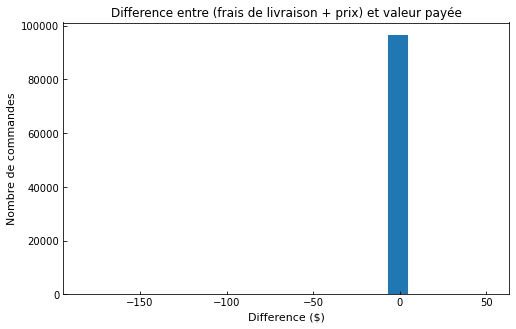

In [88]:
# distribution de la variable diff
plt.figure(figsize=(8, 5))
plt.hist(customers['diff'], bins=20)
plt.title('Difference entre (frais de livraison + prix) et valeur payée')
plt.xlabel('Difference ($)')
plt.ylabel('Nombre de commandes')

En effet pour la plupart des commandes cette différence est très petite, mais pour certaines commandes elle peut être assez élevée (jusqu'à 182 dollars). Je vais examiner les commandes pour les quelle cette différence est élevée (c’est-à-dire que la valeur absolue de la différence est supérieure à 0.1 dollars, des différences plus petites sont admises en raison des arrondis).

In [89]:
# nombre de valeurs aberrantes
customers[(customers['diff'] < -0.1) | (customers['diff'] > 0.1)].shape

(255, 17)

In [90]:
# examples valeurs aberrantes
customers[(customers['diff'] < -0.1) | (customers['diff'] > 0.1)].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value,diff
35491,52128c30f27e3166029ab4ad0b502c94,ff580ab4901e3619925a27db44eec095,48905,-9.424205,-40.494067,ddcf6c758c04fe3f2e0d1ae301ec5f40,2017-04-11 12:45:06,28.0,36.0,-9.0,39.90,17.78,fc906263ca5083d09dce42fe02247800,06c6e01186af8b98ee1fc9e01f9471e9,0.445614,66.62,-8.94
73213,d8c39b2be9b9bc058f016855e8718e54,89383f8dc2ded747e0b2636cec1e0631,25645,-22.540797,-43.201235,e8295bee3fcc58cbd94f165f36c11f4b,2017-11-24 02:09:24,24.0,24.0,-1.0,99.90,17.95,8160255418d5aaa7dbdc9f4c64ebda44,9ad75bd7267e5c724cb42c71ac56ca72,0.179680,151.93,-34.08
30111,08b0c3ca77cbc85b646e774a1ac760cc,969a073e5e07991b03418169d7fccd36,21070,-22.843914,-43.283779,4b3176150cda3ef1348ba91dfb6c7b32,2017-11-14 08:28:59,9.0,29.0,-21.0,31.90,14.10,85d9eb9ddc5d00ca9336a2219c97bb13,f71f42e2381752836563b70beb542f80,0.442006,48.67,-2.67
38491,308979f2faf0919392503a7818aefcb1,0ab747aabaf607069aeb7ed48d97d1f9,41490,-12.911270,-38.394730,47bc2fbe3e9b64a723dd530a4f1612b8,2018-01-26 15:49:31,21.0,26.0,-6.0,49.99,15.79,ea8482cd71df3c1969d7b9473ff13abc,b24af8bca8813bcde4140ff8562f5e47,0.315863,74.35,-8.57
52853,179d183ba83ebf3be4056b8b26d8dbea,4d327136275e45e51a52ad8fc71ff733,41815,-12.993950,-38.466461,585f3aa654c4d58eb968fc4fe6e3e92e,2018-02-09 22:01:17,16.0,30.0,-14.0,69.90,19.73,4559697a8f7e637227c2eeaed843baff,e5eadf9be70a4a9fa514019542fc330a,0.282260,101.31,-11.68
785,5ffaa9e0952296664dfda701a20c5519,2f2c5d1fdc5db8d9302cec6fd6dad0ad,29290,-20.860485,-40.935260,66b04218fe3a0af6ca54d243ecfb3737,2018-02-03 21:44:23,22.0,44.0,-22.0,27.90,16.79,85d9eb9ddc5d00ca9336a2219c97bb13,a1bf559ac1eab015ba992bd76d9d76c7,0.601792,46.24,-1.55
91491,7cb980ea48f7332f0c397cce1a900e59,71ac63cf26120dafb6d3c73aca37376f,89260,-26.512379,-49.133064,c14323552816050d396da49c9f23ae1e,2017-11-26 10:24:33,38.0,24.0,13.0,16.80,15.10,e5a3438891c0bfdb9394643f95273d8e,3a14e4f8d0d1c5be2acb3cd00d9c8047,0.898810,33.75,-1.85
5908,0244fcc0d060a5943dd7d4d5f87de9c8,fb9760235a090e1747caef67cc951f6c,88704,-28.475922,-49.011729,1811959f3ced8abc0645c21285a5a4d5,2017-02-28 17:40:00,9.0,21.0,-12.0,55.90,18.67,78c99c6dff4eeae5be99bf635ed21e3f,f0a7113644fce6d200240a1d0dba2b9b,0.333989,79.78,-5.21
1966,3a412111e4f293539eae05b502fc63de,f7c20fc3dc5222bc4389740958175652,8220,-23.537410,-46.466583,e73fe43cdcd166f7f0c6e3c2bf11a917,2018-08-09 18:06:43,5.0,6.0,-1.0,49.90,9.10,334cab711dee080b079fa5779b584783,544c14365db76307e0820a1468ed8114,0.182365,56.50,2.50
77522,4174d5e8a7e5d999203b1ab2870459e2,4c112bdeac93a04155c340b65b35c232,16901,-20.894499,-51.373939,8ccbe46ffeae4720eba99d2d2de07542,2017-06-06 15:19:21,10.0,27.0,-18.0,16.90,11.85,7722b1df1b0e383e000397b2c11e3e19,5e3e2d54c975cf95b62c112c4d1d935d,0.701183,30.30,-1.55


Il n'y a que 255 commandes pour lesquels `diff` est tres élevée. 

Si `diff` était toujours positive, je pourrais supposer qu’il y a eu des réductions sur le prix ou le frais de livraison, mais ce n'est pas le cas. Etant donné que je n'ai pas une explication certaine (erreur du site, de la banque, etc.?) je vais considérer ces valeurs comme aberrantes et remplacer `payment_value` avec la somme de `prix` et `fright_value`.

In [91]:
# suppression variable diff
customers.drop('diff', axis=1, inplace=True)

In [92]:
# remplacement payment_value avec somme de prix et frais de livraison
customers['payment_value'] = customers['price'] + customers['freight_value']

In [93]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

## 1.6 Reviews

Ce jeu des données contient les informations sur les avis rédigés par les clients.

In [94]:
# lecture données
reviews = pd.read_csv('Data/Source/olist_order_reviews_dataset.csv')

In [95]:
# échantillon données
reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
63978,f597a9739b74e939b29745f4657f32f9,e7b2fd1afe0ea1687d1766b2b4f2d197,5,NaN,NaN,2018-06-06 00:00:00,2018-06-11 16:42:56
150,aaab917291fea34988b9a0cb60e0716f,560f7585b57fcc9579460fa21c0d8ec1,1,NaN,"Comprei o relógio, unissex e enviaram um relóg...",2018-04-05 00:00:00,2018-04-06 11:06:19
12550,825888c7fcdb2e00ba786edf5557ae33,8f7c88fa60b5aa1c1c2cff8a775bc4c0,5,NaN,NaN,2018-05-12 00:00:00,2018-05-14 18:26:08
67620,d37a6a5246b091e90aa13dd58fe66c86,d4dbf57d426f53d8324bdd93b74642ea,5,NaN,mota 10 de boa qualidade,2018-02-10 00:00:00,2018-02-11 03:01:52
94037,85067d8373ca2d65f96d9404f09175dc,b0228af1eafc5eff8a23e1d9257f33fe,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 13:31:49


In [96]:
# nombre ligne et colonnes
reviews.shape

(99224, 7)

In [97]:
# valeurs manquantes
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Etant donné que pour la plupart des commandes il n'y a pas des commentaires, je vais supprimer les variables liées aux commentaires.

In [98]:
# suppression variables avec trop de valeurs manquantes
reviews.drop(['review_comment_title', 'review_comment_message'],
             axis=1, inplace=True)

In [99]:
# type des données
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [100]:
# doublons review_id
reviews['review_id'].duplicated().sum()

814

In [101]:
# doublons order_id
reviews['order_id'].duplicated().sum()

551

Certaines reviews correspondent à plusieurs commandes et pour certaines commandes il y a plusieurs reviews. Je vais examiner plus en détail les doublons.

In [102]:
# échantillon doublons reviews
reviews[reviews['review_id'].duplicated()].sample(10)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
56792,cb7fd7328a7dee3004454e7d05e25b8c,b1e4c784d72d000802c113dc0d4420d0,1,2017-09-29 00:00:00,2017-10-03 18:59:40
95860,02aa7f5f75e964e3c7efa59a1f515281,db92613c074f00e53066388d48ad7512,3,2017-07-27 00:00:00,2017-07-29 15:09:50
88837,37680aaaa05c4feca6dc54850acc4bda,7dfff541b2a848ecb18ceb83d02bfa6a,5,2018-03-29 00:00:00,2018-03-30 22:28:38
75144,98b82041d04be209faccad4c453ce72d,1e077c24035d25ddca3736f56d3e19a8,5,2018-03-10 00:00:00,2018-03-11 01:57:39
59567,62e707cd3907d8766accf92b716e9edb,246b14cc444e8a7df0afd80495dfa052,4,2018-07-07 00:00:00,2018-07-09 22:58:50
93075,bdc75c2855c909171095e470910d0421,c4ca4450ac2974ba5eeb4832b7ec724a,5,2017-06-07 00:00:00,2017-06-07 10:17:30
51450,5cf2a701def88cbc0317b30c867cd457,fdfc39ba2a42ef960515eb82d4dd84e2,3,2017-09-22 00:00:00,2017-10-03 23:52:30
63410,ac8f8a5e7ad241234b96b3ece57f3c2a,cfb88f9053ce059b4de5d506ca4a2c5f,3,2017-12-06 00:00:00,2017-12-07 11:20:36
72957,37143879ed397a8fcb2ed49b3ffa1e44,4fe26df981b8f298e0e6bf81c1d5ead0,5,2018-06-08 00:00:00,2018-06-10 23:29:35
60639,1f997992c19d44fe5049ec91f13ccd34,78ac0881f0e98a1afd25f066d5451d70,3,2018-02-15 00:00:00,2018-02-18 09:19:53


In [103]:
# example de doublon review_id
reviews[reviews['review_id'] == 'dfb3db02188d809d5cd199496b6da87e']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
61033,dfb3db02188d809d5cd199496b6da87e,69a2e27fe34392681b7b5ab9c5aea437,5,2018-02-17 00:00:00,2018-02-19 19:29:19
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,2018-02-17 00:00:00,2018-02-19 19:29:19


En regardant des exemples des reviews dupliquées on peut se rendre compte que s'il y a le même review_id pour des commandes différentes, le reviews dupliquées ont été créés exactement au même moment. Il s'agit probablement d'une erreur du système informatique, qui assigne le même review_id à deux commandes différentes si la review a été soumise par les clients exactement au même moment.

In [104]:
# échantillons doublons order_id
reviews[reviews['order_id'].duplicated()].sample(10)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
86641,24ad2fc85ec000ba4fbfd9841d9a1972,fd61441ba2a7b57e6342862e779b10b0,4,2017-10-14 00:00:00,2017-10-16 21:23:28
83193,ab3ad419df33ed6e049800b7ccaa4b0d,6596197a74edd396e3d34c53eff4ad6f,5,2018-02-27 00:00:00,2018-03-02 00:14:40
88883,6902c7530ba05c8f2927697108f42732,075a544c5f4ed4bb75f82b160465fe76,1,2018-03-17 00:00:00,2018-03-17 19:39:26
98184,c487103af542dc831f15ada65932a02b,2e3258f81be08e497abb202cef0c0303,4,2018-03-10 00:00:00,2018-03-16 00:31:47
76801,88ce13e429ce3faffb0225b64b4e5336,ed81dbeb0cedad4d3d1f1551b06d6ca3,2,2018-03-23 00:00:00,2018-03-24 00:20:45
58385,28642ce6250b94cc72bc85960aec6c62,bc42a955f289870d5789e6e437206300,5,2018-03-25 00:00:00,2018-03-25 21:03:02
44851,7c69fcbd86399d432e0241dff0224dd5,a979479c1af57af858b45dfd2d67ee04,4,2017-05-18 00:00:00,2017-05-19 11:41:51
95804,c210b6e904e3c7c34ff91fca84356431,94f522c26f2681ad053b999e34e7b317,3,2018-03-21 00:00:00,2018-03-21 21:41:31
70313,fde2e6abaf5bb64f7407a44741c24dec,69a2e27fe34392681b7b5ab9c5aea437,5,2018-02-17 00:00:00,2018-02-19 19:28:59
42108,bebd0c23d7791cb07b4eb3e459e5920b,0ee24d5ae95ccf0552a2ef03dfadb924,4,2017-09-07 00:00:00,2017-09-08 01:17:50


In [105]:
# example doublon order_id
reviews[reviews['order_id'] == '66355bca3dfaa134e807687ade5d3330']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
23400,443fb044ca5f287b04747fb17799dbc1,66355bca3dfaa134e807687ade5d3330,4,2017-09-01 00:00:00,2017-09-04 14:03:42
88055,47f9abdf9bff2e35b757a67e46569ddb,66355bca3dfaa134e807687ade5d3330,1,2017-08-24 00:00:00,2017-08-25 13:24:05


In [106]:
# example doublon order_id
reviews[reviews['order_id'] == '826221f0c1a1915308dccb83b841eb2f']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
25838,ac6938290c10c36fd64ed2f21b944399,826221f0c1a1915308dccb83b841eb2f,5,2017-07-25 00:00:00,2017-07-31 12:47:32
67387,f3544b47fdfb4bdd2092131d3c403ae9,826221f0c1a1915308dccb83b841eb2f,5,2017-07-25 00:00:00,2017-07-31 12:47:42


En regardant plusieurs exemples de doublons `order_id` on peut voir que:
- soit il s'agit des commandes comprenant plusieurs produits et dans ce cas il y a une review par produit
- soit il s'agit de la même review soumise deux fois 


Comme déjà fait pour les commandes contenant plusieurs produits, afin de simplifier le dataframe sans perdre trop d'information, je vais agréger les commandes sur `order_id` et utiliser la moyenne comme fonction d'agrégation pour avoir la moyenne des scores.  

In [107]:
# agrégation
reviews = reviews.groupby('order_id').agg('mean').round(0)

Enfin, je vais joindre le dataframe `reviews` avec le dataframe `customers` en utilisant `order_id` comme clé.

In [108]:
# jointure
customers = pd.merge(customers,
                     reviews,
                     how='left',
                     left_on='order_id',
                     right_index=True)

In [109]:
# vérification nombre des lignes
customers.shape[0]

96478

In [110]:
# vérification merge
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,8.0,19.0,-11.0,124.99,21.88,7c67e1448b00f6e969d365cea6b010ab,a9516a079e37a9c9c36b9b78b10169e8,0.175054,146.87,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,16.0,24.0,-8.0,289.00,46.48,b8bc237ba3788b23da09c0f1f3a3288c,4aa6014eceb682077f9dc4bffebc05b0,0.160830,335.48,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,26.0,24.0,1.0,139.94,17.79,7c67e1448b00f6e969d365cea6b010ab,bd07b66896d6f1494f5b86251848ced7,0.127126,157.73,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,14.0,27.0,-13.0,149.94,23.36,7c67e1448b00f6e969d365cea6b010ab,a5647c44af977b148e0a3a4751a09e2e,0.155796,173.30,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,11.0,16.0,-6.0,230.00,22.25,4a3ca9315b744ce9f8e9374361493884,9391a573abe00141c56e38d84d7d5b3b,0.096739,252.25,5.0


In [111]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

## 1.7 Products

Ce jeu de données contient des informations sur les produits vendus par Olist.

In [112]:
# lecture données
products = pd.read_csv('Data/Source/olist_products_dataset.csv')

In [113]:
# échantillon données
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [114]:
# catégories
products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [115]:
# nombre de catégories
products['product_category_name'].unique().size

74

Ici, la variable qui pourrait être intéressante est la catégorie du produit. Cependant, il y a beaucoup de catégories et même en regroupant certaines, le nombre serait trop élevé pour pouvoir les utiliser pour une segmentation interprétable; de plus, en utilisant les catégories, je risquerai d'introduire un 'biais' dans les modèles non supervisés, qui pourraient trouver des groupes basés sur ces catégories et non pas sur les autres variables. Ainsi, je ne vais pas utiliser ce dataframe.

## 1.8 Sellers

Ce jeu de données contient les emplacement des vendeurs.

In [116]:
# lecture données
sellers = pd.read_csv('Data/Source/olist_sellers_dataset.csv')

In [117]:
# échantillon données
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
768,20d83f3ef0e6925fd74bfd59170babf7,2804,sao paulo,SP
1277,05d2173d43ea568aa0540eba70d2ca76,37135,alfenas,MG
1419,7d7d2b7a51328016102d4528c411d630,14940,ibitinga,SP
1802,f682e0f848abafc6f41e0d4e868c66ef,7600,mairipora,SP
776,e7df4cd29ab5abab70fb0783ddb53987,4122,sao paulo,SP


In [118]:
# nombre des lignes et colonnes
sellers.shape

(3095, 4)

In [119]:
# type des données
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [120]:
# valeur manquantes
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

En utilisant le dataframe `geolocation` je peux associer à chaque zipcode ses coordonnées géographiques.

In [121]:
# jointure sellers et geolocation
sellers = pd.merge(sellers,
                   geolocation,
                   how='left',
                   left_on='seller_zip_code_prefix',
                   right_index=True)

In [122]:
# vérification nombre de lignes
sellers.shape

(3095, 6)

In [123]:
# vérification merge
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419


In [124]:
# renommage variables geolocatisation
sellers = sellers.rename(columns={'geolocation_lat': 'seller_geolocation_lat',
                                  'geolocation_lng': 'seller_geolocation_lng'})

In [125]:
# suppression variables non pertinentes
sellers = sellers.drop(['seller_state',
                        'seller_city',
                        'seller_zip_code_prefix'],
                       axis=1)

Je vais effectuer une jointure de ce dataframe avec le dataframe `customers` en utilisant comme clé le `seller_id`.

In [126]:
# jointure
customers = pd.merge(customers,
                     sellers,
                     how='left',
                     left_on='seller_id',
                     right_on='seller_id')

In [127]:
# vérification nombre des lignes
customers.shape[0]

96478

In [128]:
# vérification merge
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value,review_score,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,8.0,19.0,-11.0,124.99,21.88,7c67e1448b00f6e969d365cea6b010ab,a9516a079e37a9c9c36b9b78b10169e8,0.175054,146.87,4.0,-23.486111,-46.366721
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,16.0,24.0,-8.0,289.00,46.48,b8bc237ba3788b23da09c0f1f3a3288c,4aa6014eceb682077f9dc4bffebc05b0,0.160830,335.48,5.0,-26.912574,-48.673980
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,26.0,24.0,1.0,139.94,17.79,7c67e1448b00f6e969d365cea6b010ab,bd07b66896d6f1494f5b86251848ced7,0.127126,157.73,5.0,-23.486111,-46.366721
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,14.0,27.0,-13.0,149.94,23.36,7c67e1448b00f6e969d365cea6b010ab,a5647c44af977b148e0a3a4751a09e2e,0.155796,173.30,5.0,-23.486111,-46.366721
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,11.0,16.0,-6.0,230.00,22.25,4a3ca9315b744ce9f8e9374361493884,9391a573abe00141c56e38d84d7d5b3b,0.096739,252.25,5.0,-21.757321,-48.829744


Maintenant que j'ai les coordonnées géographiques d'acheteurs et vendeurs je peux calculer leur distance. Pour ce faire, je vais regrouper latitude et longitude dans une seule variable et utiliser la librairie `haversine`, qui permet de trouver la distance en km à partir de latitude et longitude.

In [129]:
# initialisation des variables loc_customer et loc_seller
customers['loc_customer'] = list(zip(customers['geolocation_lat'],
                                     customers['geolocation_lng']))
customers['loc_seller'] = list(zip(customers['seller_geolocation_lat'],
                                   customers['seller_geolocation_lng']))

In [130]:
# initialisation de la variable distance
customers['distance'] = customers.apply(
    lambda x: hs.haversine(x['loc_customer'], x['loc_seller']), axis=1)

In [131]:
# suppression variables non pertinentes
customers.drop(['geolocation_lat',
                'geolocation_lng',
                'seller_geolocation_lat',
                'seller_geolocation_lng',
                'loc_customer',
                'loc_seller',
                'customer_zip_code_prefix'],
               axis=1, inplace=True)

In [132]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers.csv', index=False)

# 2. Traitement des valeurs manquantes

In [133]:
# valeurs manquantes
customers.isna().sum()

customer_id                   0
customer_unique_id            0
order_id                      0
order_purchase_timestamp      0
real_delivery_time            8
estimated_delivery_time       0
delay                         8
price                         0
freight_value                 0
seller_id                     0
product_id                    0
freight/price                 0
payment_value                 0
review_score                646
distance                    478
dtype: int64

Pour les valeurs manquantes, la stratégie est la suivante :
 - remplacement avec la moyenne pour les variables `distance`, `delay` et `real_delivery_time`
 - remplacement avec la valeur la plus fréquente pour le `review_score`


In [134]:
# remplacement avec la moyenne
customers[['distance',
           'delay',
           'real_delivery_time']] = customers[['distance',
                                               'delay',
                                               'real_delivery_time']].fillna(
    customers[['distance',
               'delay',
               'real_delivery_time']].mean())

In [135]:
# vérification remplacement valeurs manquantes
customers.isna().sum()

customer_id                   0
customer_unique_id            0
order_id                      0
order_purchase_timestamp      0
real_delivery_time            0
estimated_delivery_time       0
delay                         0
price                         0
freight_value                 0
seller_id                     0
product_id                    0
freight/price                 0
payment_value                 0
review_score                646
distance                      0
dtype: int64

In [136]:
# comptage valeurs review_score
customers['review_score'].value_counts()

5.0    56704
4.0    18945
1.0     9313
3.0     7916
2.0     2954
Name: review_score, dtype: int64

In [137]:
# remplacement valeurs manquantes
customers['review_score'] = customers['review_score'].fillna(5)

In [138]:
# sauvegarde données
customers.to_csv('Data/Cleaning/customers_notna.csv', index=False)

# 3. Analyse exploratoire des données

Dans cette partie, je vais réaliser des analyses univariées pour mieux comprendre les données, je vais examiner les valeurs aberrantes, examiner la corrélation entre variables et réaliser une analyse en composantes principales (ACP).

In [49]:
# lecture données
customers = pd.read_csv('Data/Cleaning/customers_notna.csv')

In [50]:
# statistique de base
customers.describe()

,real_delivery_time,estimated_delivery_time,delay,price,freight_value,freight/price,payment_value,review_score,distance
count,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000,96478.000000
mean,12.093604,23.372759,-11.875889,137.041586,22.785253,0.308370,159.826839,4.161560,600.522752
std,9.550984,8.758137,10.181683,209.045198,21.559197,0.311610,218.794219,1.281266,591.064487
min,0.000000,2.000000,-147.000000,0.850000,0.000000,0.000000,9.590000,1.000000,0.000000
25%,6.000000,18.000000,-17.000000,45.900000,13.850000,0.132016,61.850000,4.000000,189.032874
50%,10.000000,23.000000,-12.000000,86.575000,17.170000,0.224374,105.280000,5.000000,436.517703
75%,15.000000,28.000000,-7.000000,149.900000,24.017500,0.380531,176.260000,5.000000,795.894094
max,209.000000,155.000000,188.000000,13440.000000,1794.960000,21.447059,13664.080000,5.000000,3927.411451


## 3.1 Distribution des variables 

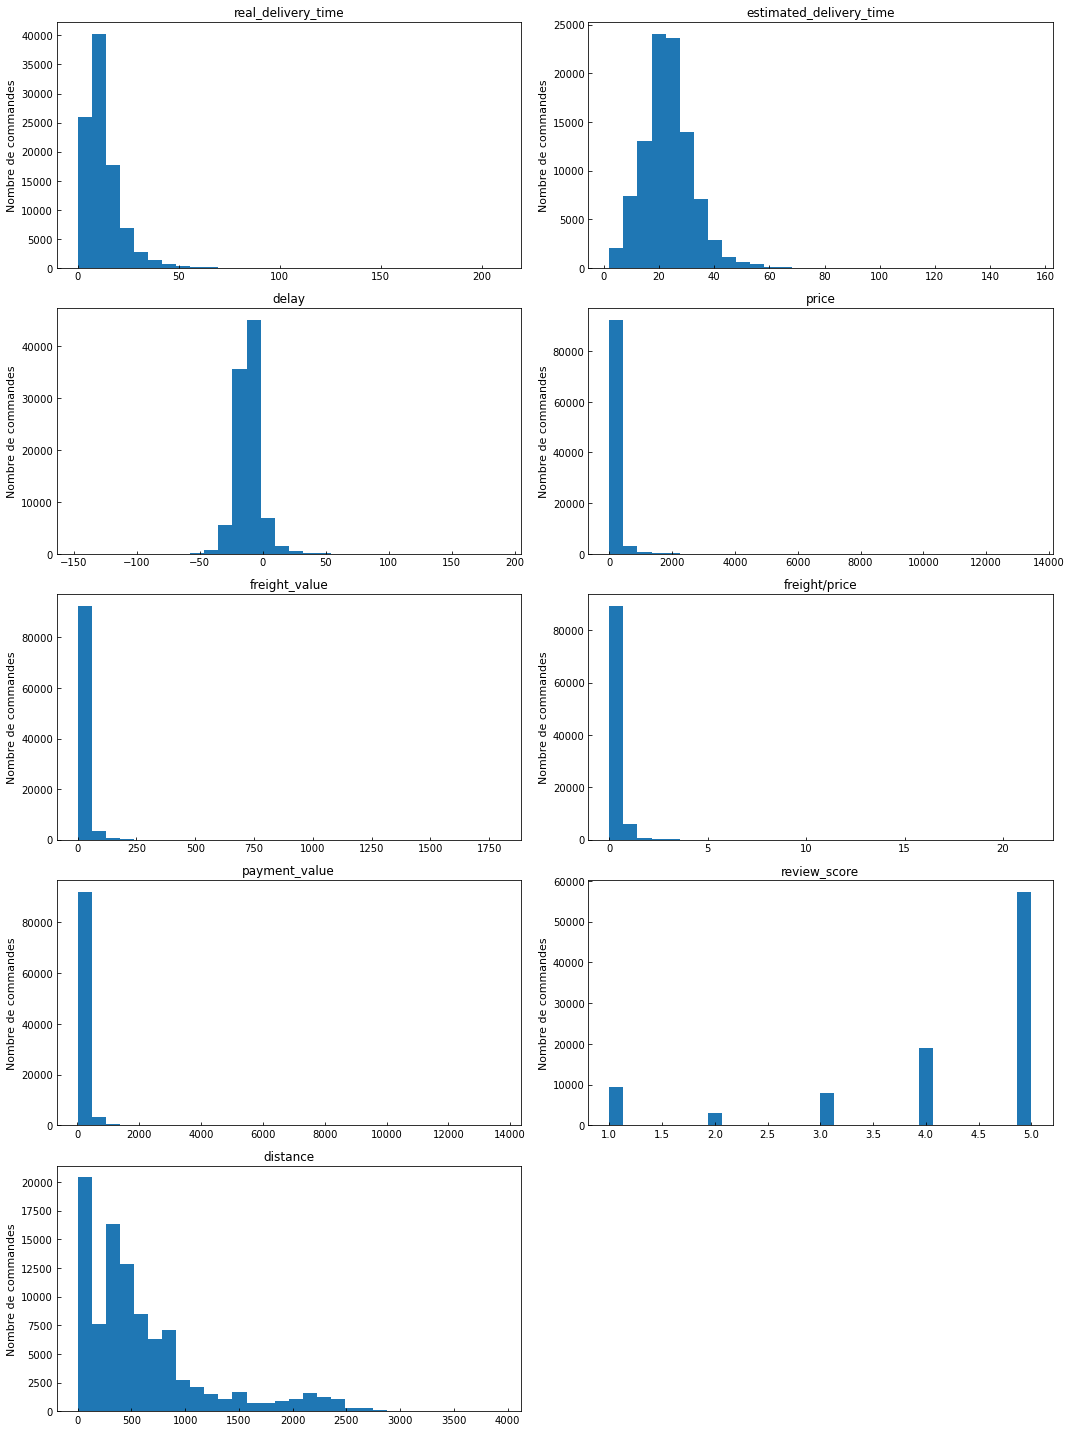

In [51]:
# histogrammes
fig, ax = plt.subplots(5, 2, figsize=(15, 20))
count = 1
for col in customers.select_dtypes('float64').columns:
    plt.subplot(5, 2, count)
    plt.title(col)
    plt.hist(customers[col], bins=30)
    plt.ylabel('Nombre de commandes')
    count += 1
fig.delaxes(ax[4][1])
plt.tight_layout()

Pas toutes les distribution ressemblent à des gaussiennes et il y a des valeurs 'extremes'. 

## 3.2 Boites à moustaches et valeurs aberrantes

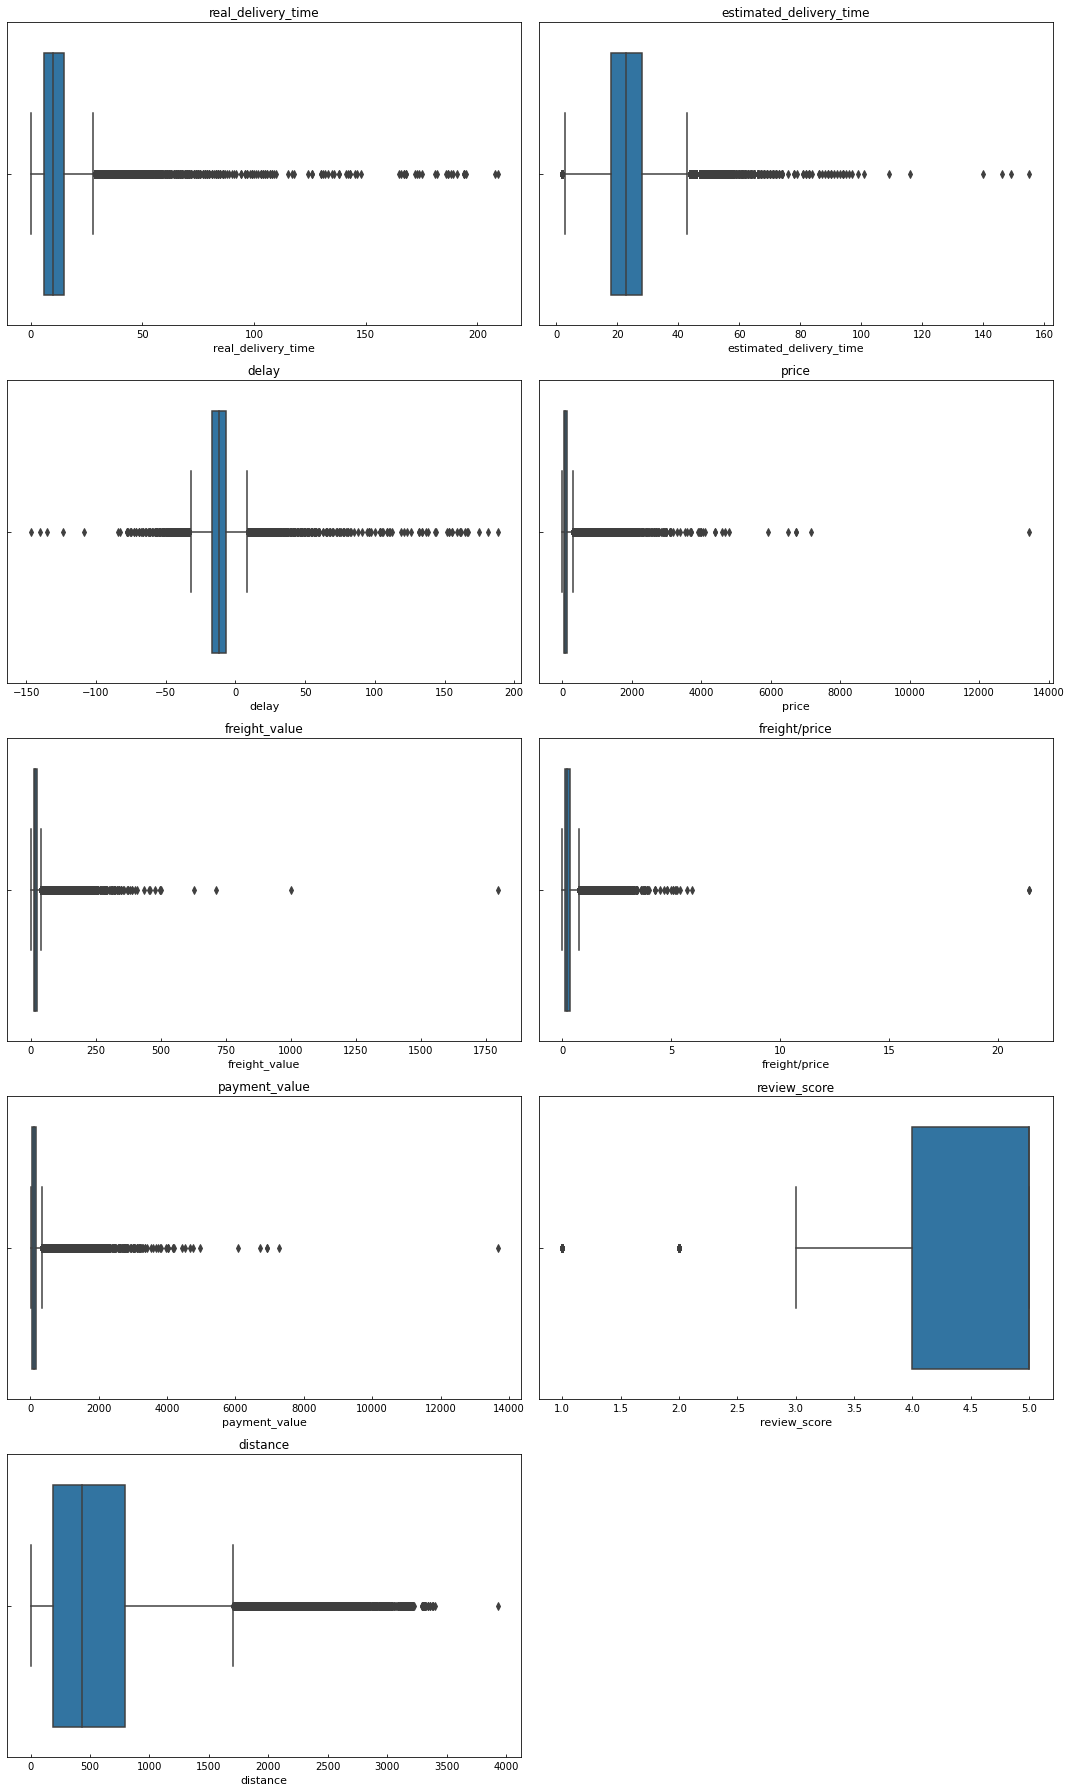

In [52]:
# boxplots
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
count = 1
for col in customers.select_dtypes('float64').columns:
    plt.subplot(5, 2, count)
    plt.title(col)
    sns.boxplot(data=customers, x=col)
    count += 1
fig.delaxes(ax[4][1])
plt.tight_layout()

Les boites à moustaches permettent de voir que, sauf pour la variable `review_score`, il y a beaucoup des valeurs aberrantes et/ou atypiques. Je vais ainsi examiner ces valeurs.

### 3.2.1 real_delivery_time

In [53]:
# dataframe des delais de livraison réels le plus élevés
customers.sort_values('real_delivery_time', ascending=False).head(10)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value,review_score,distance
26975,75683a92331068e2d281b11a7866ba44,4a2519b6991378f6f2ce5ed22d308f03,ca07593549f1816d26a572e06dc1eab6,2017-02-21 23:31:27,209.0,28.0,181.0,229.90,15.78,2a1348e9addc1af5aaa619b1a3679d6b,8eed5d27f5b8c6248731efb4782f6141,0.068639,245.68,5.0,429.972607
68602,d306426abe5fca15e54b645e4462dc7b,eb21169c3153a2b507fc7e76d561ff14,1b3190b2dfa9d789e1f14c05b647a14a,2018-02-23 14:57:35,208.0,19.0,188.0,144.99,17.26,7a67c85e85bb2ce8582c35f2203ad736,ee406bf28024d97771c4b1e8b7e8e219,0.119043,162.25,2.0,327.924374
3481,7815125148cfa1e8c7fee1ff7974f16c,f0785d41d416fa827f24c4b95d066b69,440d0d17af552815d15a9e41abe49359,2017-03-07 23:59:51,195.0,30.0,165.0,159.90,25.12,2a1348e9addc1af5aaa619b1a3679d6b,3bec03860f3782ef8993056e01b8229a,0.157098,185.02,1.0,2129.768094
69212,217906bc11a32c1e470eb7e08584894b,c6c0b794d3e4eb69cd85d1438a0db26e,2fb597c2f772eca01b1f5c561bf6cc7b,2017-03-08 18:09:02,194.0,39.0,155.0,239.96,105.19,a7f13822ceb966b076af67121f87b063,8ed094bfe076c568f6bb10feada3f75d,0.438365,345.15,4.0,2076.683225
21160,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,285ab9426d6982034523a855f55a885e,2017-03-08 22:47:40,194.0,28.0,166.0,429.90,27.75,c847e075301870dd144a116762eaff9a,0c6fc9b9317a68d1cda098c063914b72,0.064550,457.65,1.0,1475.190521
55006,1a8a4a30dc296976717f44e7801fdeef,4df2d7257a7463e2d7a98a5b08cb92fc,0f4519c5f1c541ddec9f21b3bddd533a,2017-03-09 13:26:57,194.0,32.0,161.0,231.27,27.88,7e93a43ef30c4f03f38b393420bc753a,e0d64dcfaa3b6db5c54ca298ae101d05,0.120552,259.15,4.0,2103.897550
66803,cb2caaaead400c97350c37a3fc536867,4cb8ad9a4554099db7d70c13d0dae906,47b40429ed8cce3aee9199792275433f,2018-01-03 09:44:01,191.0,15.0,175.0,399.00,54.33,cb41bfbcbda0aea354a834ab222f9a59,ebf1c13032246ea801765e8cb5417365,0.136165,453.33,1.0,90.564373
51300,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,2fe324febf907e3ea3f2aa9650869fa5,2017-03-13 20:17:10,189.0,22.0,167.0,39.90,16.05,df683dfda87bf71ac3fc63063fba369d,b75683e29689c1a989ae97883e8cad56,0.402256,55.95,1.0,828.831643
66330,8199345f57c6d1cbe9701f92481beb8d,186a453a38d349c487ccbf472b31fb39,2d7561026d542c8dbd8f0daeadf67a43,2017-03-15 11:24:27,188.0,28.0,159.0,32.90,20.80,e83c76265fc54bf41eac728805e4da77,7594c5fa74bceda1c2540003533a6e02,0.632219,53.70,3.0,1823.898123
90330,f85e9ec0719b16dc4dd0edd438793553,e7834c7e017fb854ac65189a66c33132,c27815f7e3dd0b926b58552628481575,2017-03-15 23:23:17,187.0,25.0,162.0,487.00,48.90,054694fa03fe82cec4b7551487331d74,05e8eca656b87428a0e8453a2f335cdf,0.100411,535.90,3.0,285.077486


In [54]:
customers[customers['real_delivery_time'] > 30].shape[0]

4117

Le commandes avec un delai de livraison réel supérieur à un mois representent le 4% des commandes. Il est normal que parfois il puisse y avoir des souci de livraison, il s'agit des valeurs atypiques mais pas aberrantes.

### 3.2.2 estimated_delivery_time

In [55]:
# dataframe avec les delais de livraison éstimés les plus élévés
customers.sort_values(
    'estimated_delivery_time', ascending=False
).select_dtypes('float64').head(10)

,real_delivery_time,estimated_delivery_time,delay,price,freight_value,freight/price,payment_value,review_score,distance
60568,20.0,155.0,-135.0,252.99,19.02,0.075181,272.01,3.0,1058.161511
32292,3.0,149.0,-147.0,125.98,20.18,0.160184,146.16,5.0,103.209427
28256,6.0,146.0,-140.0,25.90,26.09,1.007336,51.99,5.0,2367.755351
40360,16.0,140.0,-124.0,199.98,122.88,0.614461,322.86,5.0,333.854784
26299,7.0,116.0,-109.0,40.00,14.10,0.352500,54.10,5.0,337.456461
38149,54.0,109.0,-56.0,189.80,76.42,0.402634,266.22,2.0,2159.854444
13607,63.0,101.0,-38.0,179.90,45.34,0.252029,225.24,5.0,832.064369
71316,47.0,99.0,-52.0,179.90,45.34,0.252029,225.24,2.0,833.506131
56294,28.0,97.0,-69.0,169.90,70.41,0.414420,240.31,1.0,1703.780079
13678,55.0,96.0,-41.0,194.70,33.18,0.170416,227.88,5.0,4.462238


In [56]:
# échantillon des données avec delai estimé de livraison supèrieur à un mois
customers[customers['estimated_delivery_time'] > 30].select_dtypes(
    'float64').sample(10)

,real_delivery_time,estimated_delivery_time,delay,price,freight_value,freight/price,payment_value,review_score,distance
35987,9.0,37.0,-28.0,109.82,20.01,0.182207,129.83,4.0,1323.082368
35179,22.0,34.0,-13.0,129.00,18.15,0.140698,147.15,5.0,598.509765
44846,19.0,35.0,-17.0,160.00,38.67,0.241687,198.67,4.0,2161.711992
51415,22.0,36.0,-15.0,39.99,15.10,0.377594,55.09,3.0,583.706189
88782,31.0,32.0,-1.0,38.90,16.79,0.431620,55.69,2.0,1122.775877
11989,31.0,33.0,-2.0,69.00,22.41,0.324783,91.41,5.0,1186.477357
70128,8.0,49.0,-42.0,49.74,48.70,0.979091,98.44,5.0,2677.819697
18348,7.0,31.0,-24.0,38.90,12.48,0.320823,51.38,5.0,124.066923
44282,16.0,35.0,-20.0,27.90,15.10,0.541219,43.00,5.0,296.557854
65558,5.0,33.0,-29.0,1299.00,52.94,0.040754,1351.94,5.0,2240.649836


On peut voir que, même si le delai de livraison estimé est très grand, le delai de livraison réel est beaucoup plus petit.
Ainsi, il ne s'agit pas des valeurs vraiment aberrantes, mais probablement une surestimation systématique du delai de livraison.


### 3.2.3 delay

Les valeurs très négatives de la variable `delay` sont expliqués par la surestimation systématique du delai de livraison. 
Je vais examiner les commandes pour lesquels le retard est supérieur à une semaine et à un mois.


In [57]:
# nombre des commandes avec un retard supérieur à 7
customers[customers['delay'] > 7].shape

(2862, 15)

In [58]:
# nombre des commandes avec un retard supérieur à 30
customers[customers['delay'] > 30].shape

(345, 15)

Le nombre de commandes avec un retard de livraison élévé est petit par rapport au nombre de commandes totales. Il est normal que parfois il puisse y avoir des souci de livraison, il s'agit des valeurs atypiques mais pas aberrantes.

### 3.2.4 price

In [59]:
# dataframe des prix les plus élevés
customers.sort_values('price', ascending=False).head(10)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value,review_score,distance
6010,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,18.0,23.0,-6.0,13440.0,224.08,b37c4c02bda3161a7546a4e6d222d5b2,5769ef0a239114ac3a854af00df129e4,0.016673,13664.08,1.0,345.405946
95509,ec5b2ba62e574342386871631fafd3fc,763c8b1c9c68a0229c42c9fc6f662b93,736e1922ae60d0d6a89247b851902527,2018-07-15 14:49:44,11.0,17.0,-7.0,7160.0,114.88,b37c4c02bda3161a7546a4e6d222d5b2,19936fa4f614ee0590d3b77ac83fd648,0.016045,7274.88,1.0,728.347845
13057,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12 20:37:36,18.0,24.0,-6.0,6735.0,194.31,e3b4998c7a498169dc7bce44e6bb6277,489ae2aa008f021502940f251d4cce7f,0.028851,6929.31,5.0,895.682740
20549,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,fefacc66af859508bf1a7934eab1e97f,2018-07-25 18:10:17,20.0,15.0,5.0,6729.0,193.21,80ceebb4ee9b31afb6c6a916a574a1e2,69c590f7ffc7bf8db97190b6cb6ed62e,0.028713,6922.21,5.0,1171.341502
3776,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,f5136e38d1a14a4dbd87dff67da82701,2017-05-24 18:14:34,11.0,34.0,-23.0,6499.0,227.66,ee27a8f15b1dded4d213a468ba4eb391,1bdf5e6731585cf01aa8169c7028d6ad,0.035030,6726.66,5.0,616.608206
83793,05455dfa7cd02f13d132aa7a6a9729c6,4007669dec559734d6f53e029e360987,2cc9089445046817a7539d90805e6e5a,2017-11-24 11:03:35,19.0,27.0,-9.0,5934.6,146.94,f08a5b9dd6767129688d001acafc21e5,c183fd5d2abf05873fa6e1014ed9e06c,0.024760,6081.54,1.0,1264.674007
26510,df55c14d1476a9a3467f131269c2477f,da122df9eeddfedc1dc1f5349a1a690c,a96610ab360d42a2e5335a3998b4718a,2017-04-01 15:58:40,15.0,30.0,-15.0,4799.0,151.34,59417c56835dd8e2e72f91f809cd4092,a6492cc69376c469ab6f61d8f44de961,0.031536,4950.34,5.0,522.243034
11697,24bbf5fd2f2e1b359ee7de94defc4a15,eebb5dda148d3893cdaf5b5ca3040ccb,199af31afc78c699f0dbf71fb178d4d4,2017-04-18 18:50:13,18.0,26.0,-8.0,4690.0,74.34,59417c56835dd8e2e72f91f809cd4092,c3ed642d592594bb648ff4a04cee2747,0.015851,4764.34,4.0,158.554783
39480,3d979689f636322c62418b6346b1c6d2,48e1ac109decbb87765a3eade6854098,8dbc85d1447242f3b127dda390d56e19,2018-06-22 12:23:19,13.0,24.0,-11.0,4590.0,91.78,c72de06d72748d1a0dfb2125be43ba63,259037a6a41845e455183f89c5035f18,0.019996,4681.78,5.0,1174.667037
53365,cc803a2c412833101651d3f90ca7de24,a229eba70ec1c2abef51f04987deb7a5,d2f270487125ddc41fd134c4003ad1d7,2018-05-31 22:57:07,4.0,27.0,-23.0,4400.0,45.50,2bf6a2c1e71bbd29a4ad64e6d3c3629f,df676834e2a38e1bf267bd85a2dc8e3a,0.010341,4445.50,5.0,88.418416


In [60]:
# product_id des commandes avec les prix le plus elevé
price_outliers = customers.sort_values(
    'price', ascending=False
).head(10)['product_id'].values

In [61]:
# description des produits avec le prix plus eleve
products = pd.read_csv('Data/Source/olist_products_dataset.csv')
products[products['product_id'].isin(price_outliers)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5755,19936fa4f614ee0590d3b77ac83fd648,telefonia_fixa,34.0,1016.0,2.0,1100.0,20.0,16.0,20.0
5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0
9530,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0
14423,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0
19459,df676834e2a38e1bf267bd85a2dc8e3a,relogios_presentes,43.0,987.0,1.0,550.0,17.0,14.0,15.0
21197,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0
21768,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0
24994,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0
25620,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0
27006,c183fd5d2abf05873fa6e1014ed9e06c,agro_industria_e_comercio,53.0,1461.0,1.0,1500.0,22.0,16.0,24.0


Les produits les plus chers correspondent à des produits électromenagers, des objets d'art et des ordinateurs. Il est raisonnable que leur prix soit éléve.
Par contre, les deux commandes avec le prix le plus élévé (13440 et 7160 dollars) correspondent à des produits de telephonie fixe. Je vais voir s’il s’agit des commandes comprenant plusieurs produits. 


In [62]:
# dataset items
items = pd.read_csv('Data/Source/olist_order_items_dataset.csv')

In [63]:
# commande avec le prix le plus élévé - 13440 dollar
items[items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


In [64]:
# commande avec le deuxième prix le plus élévé
items[items['order_id'] == '736e1922ae60d0d6a89247b851902527']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50768,736e1922ae60d0d6a89247b851902527,1,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72
50769,736e1922ae60d0d6a89247b851902527,2,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72
50770,736e1922ae60d0d6a89247b851902527,3,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72
50771,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72


En effet, les 2 commandes avec le prix le plus élévé correspondend à des commandes comprenant plusieurs produits, il s'agit des valeurs atypiques mais pas aberrantes.

### 3.2.5 freight_value

In [65]:
# dataframe des commandes avec les frais de livraison le plus elévés
customers.sort_values('freight_value', ascending=False).head(10)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,real_delivery_time,estimated_delivery_time,delay,price,freight_value,seller_id,product_id,freight/price,payment_value,review_score,distance
49046,ed583a2a1eaf0dedc33af816153e8b8c,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,2018-07-02 16:39:59,13.0,29.0,-16.0,1050.00,1794.96,56e361f411e38dcef17cdc2a3d99628b,bc3c6d2a621414f2e1df7a8a32a2828e,1.709486,2844.96,5.0,2133.517672
17770,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,2017-06-20 12:39:46,10.0,21.0,-12.0,419.40,1002.29,e8f6dc8e6a1dcde89d20e3995c8d90b3,368645a47a15770520ad12d9ea77c2f2,2.389819,1421.69,1.0,378.533932
56804,088d20d5878711d537176871a6e850e4,ef7361e14a64f77990f58e9c571e2f9a,cfed507ac357129f750f05a0d7d71b15,2018-02-25 12:15:02,39.0,29.0,10.0,1380.00,711.33,08cdbae123ff67ca4e36d9d641ce0119,b6106bf3d09b8fdd33c3a9559da43145,0.515457,2091.33,1.0,1546.695601
54346,8c20d9bfbc96c5d39025d77a3ba83d7f,eae0a83d752b1dd32697e0e7b4221656,71dab1155600756af6de79de92e712e3,2018-02-01 18:32:02,39.0,48.0,-10.0,1361.89,626.64,7c67e1448b00f6e969d365cea6b010ab,308e4e21ae228a10f6370a243ae59995,0.460125,1988.53,3.0,1664.751284
83896,023cf83ac35d703a6f3c1b31bcf844d5,5a494c648fde2d1ec4eb614274ea7159,17784b9fbb37fb0bdc230d8ed6f6b355,2018-03-08 19:06:08,14.0,26.0,-12.0,840.00,502.98,1025f0e2d44d7041d6cf58b6550e0bfa,acc444eb5ad26f79d5a11baa6a03c439,0.598786,1342.98,1.0,1454.543759
86494,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,27.0,54.0,-27.0,1570.00,497.42,17f51e7198701186712e53a39c564617,c100e5fef1abb5e1c5054d1dac2d83ac,0.316828,2067.42,5.0,1996.473229
5164,42c0b09d094220a110c0e0e941f76f06,527f7f3237fb1397c459701bc765b6f0,5bd06bab48e0423fc35d1c236d48a6bb,2017-05-11 19:17:49,26.0,41.0,-15.0,1520.00,497.08,17f51e7198701186712e53a39c564617,1d16c0509e7011656e03c6a582ff6667,0.327026,2017.08,5.0,2074.172345
4302,0c792d32a3251b4f69dae8646dfbedbc,6d394722d5fc5e721aee6875a218d8db,be382a9e1ed25128148b97d6bfdb21af,2017-11-04 17:29:15,19.0,26.0,-8.0,1559.92,479.28,7c67e1448b00f6e969d365cea6b010ab,6dde44b4172999f35f08654d06bad633,0.307247,2039.20,4.0,310.241509
10277,88324c93ce11436ae046563bf0da285c,6411590d91c48640cb07e72fbb4a359e,c52c7fbe316b5b9d549e8a25206b8a1f,2018-03-19 18:58:49,8.0,22.0,-14.0,1161.00,458.73,7a241947449cc45dbfda4f9d0798d9d0,0e1fa2aadc04afbf8fb30200aeba06a2,0.395116,1619.73,1.0,670.093019
83399,368f207cdc8f5c93a2b2a5d4cce96ba8,f9172a6495d46451776be8bc8e46032d,62073ec6b54b8e6322037fc0f3591ad3,2018-04-02 12:22:06,22.0,37.0,-16.0,859.66,456.47,5058e8c1e82653974541e83690655b4a,1eba879220bd0981a0e2fbab499ed4e1,0.530989,1316.13,2.0,297.488302


In [66]:
# product_id des commandes avec les frais de livraison le plus élévés
freight_outliers = customers.sort_values(
    'freight_value', ascending=False
).head(10)['product_id'].values

In [67]:
# dataframe des produits avec les frais de livraison le plus élevés
products[products['product_id'].isin(freight_outliers)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
33,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,57.0,476.0,1.0,8950.0,52.0,51.0,17.0
2568,6dde44b4172999f35f08654d06bad633,moveis_escritorio,55.0,1180.0,1.0,16167.0,64.0,62.0,25.0
6004,368645a47a15770520ad12d9ea77c2f2,moveis_decoracao,61.0,603.0,2.0,30000.0,70.0,60.0,60.0
15636,0e1fa2aadc04afbf8fb30200aeba06a2,utilidades_domesticas,54.0,2050.0,4.0,2000.0,100.0,28.0,20.0
15982,c100e5fef1abb5e1c5054d1dac2d83ac,beleza_saude,57.0,534.0,1.0,30000.0,55.0,75.0,61.0
18469,acc444eb5ad26f79d5a11baa6a03c439,moveis_decoracao,53.0,626.0,1.0,9400.0,35.0,45.0,45.0
21795,bc3c6d2a621414f2e1df7a8a32a2828e,sinalizacao_e_seguranca,50.0,408.0,3.0,18700.0,36.0,105.0,36.0
24029,1d16c0509e7011656e03c6a582ff6667,beleza_saude,57.0,430.0,1.0,30000.0,55.0,75.0,61.0
25968,b6106bf3d09b8fdd33c3a9559da43145,moveis_sala,57.0,725.0,1.0,30000.0,48.0,52.0,75.0
26126,308e4e21ae228a10f6370a243ae59995,moveis_escritorio,41.0,1083.0,1.0,8250.0,53.0,74.0,18.0


Les frais de livraison le plus élevés sont pour des produits de décoration ou des meubles, assez encombrants et lourds. Il est donc raisonnable que les frais de livraison soient éléves.

### 3.2.6 distance

In [68]:
# dataframe des commandes avec la distance la plus élévée
customers.sort_values('distance', ascending=False).select_dtypes(
    'float64'
).head(10)

,real_delivery_time,estimated_delivery_time,delay,price,freight_value,freight/price,payment_value,review_score,distance
69626,21.0,19.0,2.0,160.00,34.88,0.218000,194.88,5.0,3927.411451
10849,32.0,49.0,-17.0,219.90,37.31,0.169668,257.21,5.0,3399.195601
82292,25.0,52.0,-28.0,129.00,33.79,0.261938,162.79,3.0,3387.365153
22818,30.0,46.0,-17.0,30.10,33.24,1.104319,63.34,4.0,3381.368149
61984,11.0,59.0,-49.0,403.10,96.42,0.239196,499.52,5.0,3379.430598
48871,38.0,32.0,6.0,119.99,84.39,0.703309,204.38,5.0,3359.276726
29567,23.0,61.0,-39.0,125.19,60.94,0.486780,186.13,5.0,3357.866942
23312,8.0,36.0,-29.0,129.90,33.80,0.260200,163.70,5.0,3343.265169
8001,16.0,35.0,-19.0,259.90,32.49,0.125010,292.39,4.0,3341.691511
9608,24.0,60.0,-37.0,105.00,47.00,0.447619,152.00,5.0,3338.612477


La distance entre vendeur et acheteur peut arriver à presque 4000 km, mais c'est n'est pas étonnant si on considère l'extension du Brésil.

In [69]:
# sauvegarde données
customers.to_csv('Data/customers_cleaned_non_grouped.csv',
                 index=False)

## 3.3 Agrégation sur `customer_unique_id`

Avant de poursuivre les analyses, je vais faire une agrégation du dataframe sur le `customer_unique_id` afin de pouvoir calculer la récence, la fréquence et la valeur monétaire des clients. 
Ceci sera aussi le dataframe que je vais utiliser pour les modélisations non supervisées. 

En ce qui concerne les fonctions d'agrégation, je vais utiliser
  - le max de `order_purchase_timestamp` pour obtenir la date de la dernière commande effectuée et ensuite calculer la récence
 - la somme pour `paiement_value`pour avoir la valeur monétaire des clients 
- le count sur `customer_id`  pour avoir la fréquence d'achat (le nombre total des commandes effectuées par un client)
 - la moyenne pour les autres variables
 
La récence sera calculée en mois en soustrayant la date de la dernière commande effectuée par un client à la date maximale de ` order_purchase_timestamp `, c’est-à-dire le 29/08/2018. Une récence de 0 correspondra donc à des commandes effectuées en aout 2018.


In [173]:
# agrégation
customers = customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',
    'estimated_delivery_time': 'mean',
    'delay': 'mean',
    'real_delivery_time': 'mean',
    'freight_value': 'mean',
    'payment_value': 'sum',
    'freight/price': 'mean',
    'review_score': 'mean',
    'distance': 'mean',
    'customer_id': 'count'})

In [174]:
# renommage variable customer_id en frequency
customers = customers.rename(columns={'customer_id': 'frequency'})

In [175]:
# conversion en datetime
customers['order_purchase_timestamp'] = pd.to_datetime(
    customers['order_purchase_timestamp'])

In [177]:
# calcul récence
customers['recency'] = (
    customers['order_purchase_timestamp'].max()
    - customers['order_purchase_timestamp']
).astype('timedelta64[M]')

Je vais examiner la distribution des variables `recency` et `frequency`.

Text(0.5, 1.0, 'Distribution de la variable récence')

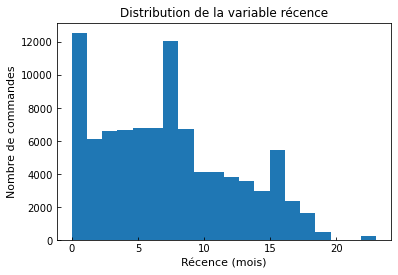

In [182]:
# distribution de la variable recency
plt.hist(customers['recency'], bins=20)
plt.xlabel('Récence (mois)')
plt.ylabel('Nombre de commandes')
plt.title('Distribution de la variable récence')

Text(0.5, 1.0, 'Distribution de la variable fréquence')

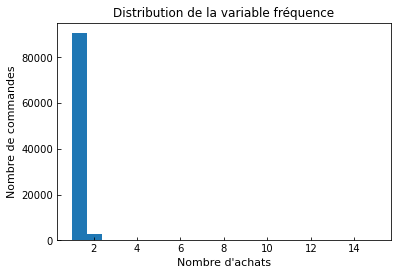

In [181]:
# distribution de la variable frequency
plt.hist(customers['frequency'], bins=20)
plt.xlabel('Nombre d\'achats')
plt.ylabel('Nombre de commandes')
plt.title('Distribution de la variable fréquence')

On peut bien voir que très peu de clients ont acheté plus d'une fois.

## 3.4 Corrélations entre variables et ACP

### 3.4.1 Corrélations

Text(0.5, 1.0, 'Corrélogramme')

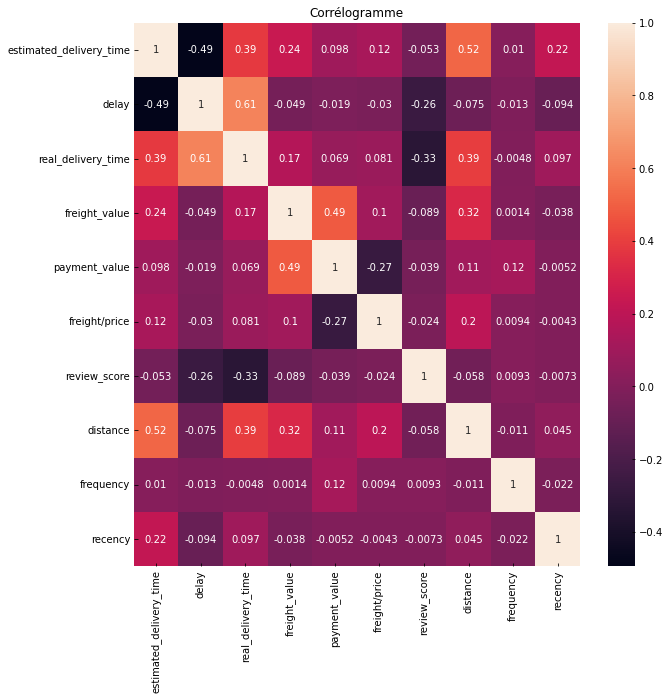

In [183]:
# corrélogramme
plt.figure(figsize=(10, 10))
sns.heatmap(customers.corr(), annot=True)
plt.title('Corrélogramme')

Les variables liées à la date de livraison (`real_delivery time`, `estimated_delivery_time`, `delay`) sont corrélées entre elles et corrélées avec la distance : il est raisonnable de penser que plus la distance entre vendeur et acheteur est élevée, plus le délai de livraison réel et estimé sera grand.

Le `freight_value` soit corrélé au `payment_value`, ce qui est logique étant donné que `payment_value`, est la somme de frais de livraison et prix des articles.

En ce qui concerne les autres variables, les corrélation sont plutôt faibles.


### 3.4.2 ACP

In [185]:
# scaling des données
scaler = MinMaxScaler()

# données pour 'ACP
data_ACP = customers.drop('order_purchase_timestamp', axis=1)
data_ACP_scaled = pd.DataFrame(scaler.fit_transform(data_ACP),
                               columns=data_ACP.columns)

# ACP
pca = PCA()
pca.fit(data_ACP_scaled)

PCA()

Text(0, 0.5, 'Pourcentage de variance expliqué')

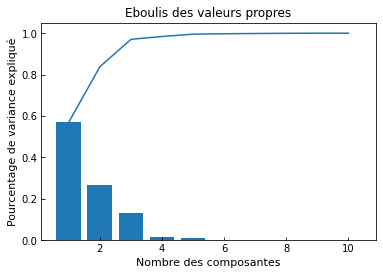

In [186]:
# Eboulis des valeurs propres
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum())
plt.title('Eboulis des valeurs propres')
plt.xlabel('Nombre des composantes')
plt.ylabel('Pourcentage de variance expliqué')

Les deux prémieres composantes principales permettent d'expliquer plus de 80% de la variance

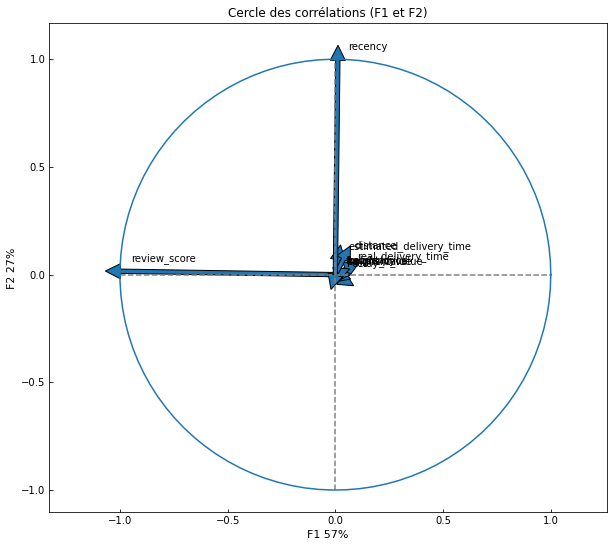

In [188]:
# cercle des corrélations
plot_correlations(data_ACP_scaled, 0, 1)

Dans le mapping ci-dessus, on voit clairement que `review_score` est très bien corrélé avec la première composante principale et `recency` est très bien corrélée avec la deuxième composante principale. 
Cela suggère que ces deux variables seront très importantes pour segmenter les clients.


In [189]:
# sauvegarde données
customers.to_csv('Data/customers_cleaned.csv')

# 4. Conclusions

A partir du jeu de données de départ, des variables potentiellement intéressantes pour la segmentation ont été sélectionnées : valeur monétaire, récence, fréquence, avis des clients, variables associées à la date de livraison, distance entre vendeur et acheteur et rapport entre frais de livraison et prix des produits. 

Les valeurs manquantes ont été traités en choisissant la méthode appropriée s

 - Remplacement avec la valeur la plus fréquente pour `review_score`
 - Remplacement avec la moyenne pour `real_delivery_time`, `delay` et `distance`


Une fois le jeu de données nettoyé, j'ai réalisé :
 - Des analyses univariées pour étudier les distributions des variables. Ceci a permis de voir que les distributions ne sont pas toutes gaussiennes et des transformations des variables vont probablement être nécessaires lors des modélisations
 -Des analyse des valeurs aberrants qui ont permis de voir qu'il y a des valeurs atypiques mais pas aberrantes
 - Une analyse des corrélations des variables, qui a permis de voir que les variables sont faiblement corrélées 
  - Une ACP, qui a permis de voir que la récence et le review_score expliquent une grande partie de la variance

Le jeu des données est prêt pour la modélisation.
